<a href="https://colab.research.google.com/github/silverstar0727/layer_thickness/blob/master/%EB%B0%95%EB%A7%89_%EB%91%90%EA%BB%98_%EC%B8%A1%EC%A0%95_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# 필요한 라이브러리 import

import numpy as np
import pandas as pd

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 처리
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import * # 일단 싹 다. 모델평가를 해야해서...
from sklearn.model_selection import * # 너도 싹 다.
import tensorflow.keras
from keras.optimizers import Adam

from datetime import datetime


In [0]:
# Activation fucntion으로 gelu를 사용 gelu가 relu보다 효과가 좋음
# Gaussian Error Linear Units
from keras.utils.generic_utils import get_custom_objects
import tensorflow as tf
class activation_gelu(Activation):
  def __init__(self, activation, **kwargs):
    super(activation_gelu, self).__init__(activation, **kwargs)
    self.__name__ = 'gelu'

def func_gelu(K):
  return 0.5 * K * (1 + tf.tanh(tf.sqrt(2 / np.pi) * (K + 0.044715 * tf.pow(x, 3))))

get_custom_objects().update({'gelu': activation_gelu(func_gelu)})

In [27]:
# 구글 드라이브 연동
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
# 데이터 불러오기
train = pd.read_csv('/content/gdrive/My Drive/machine_learning/박막두께/train_set.csv')
test = pd.read_csv('/content/gdrive/My Drive/machine_learning/박막두께/test_set.csv')
sample_submission = pd.read_csv('/content/gdrive/My Drive/machine_learning/박막두께/sample_submission.csv')

In [29]:
# 데이터 요약
print(train.describe())
print(test.describe())
print(sample_submission.describe())

                  id        layer_1  ...            224            225
count  170100.000000  170100.000000  ...  170100.000000  170100.000000
mean    85049.500000     155.043269  ...       0.631455       0.633718
std     49103.784732      86.527234  ...       0.195622       0.195101
min         0.000000      10.000000  ...      -0.005321      -0.005659
25%     42524.750000      80.000000  ...       0.508407       0.511000
50%     85049.500000     160.000000  ...       0.677139       0.679399
75%    127574.250000     230.000000  ...       0.787409       0.789263
max    170099.000000     300.000000  ...       0.941404       0.943648

[8 rows x 231 columns]
                id             0  ...           224           225
count  18900.00000  18900.000000  ...  18900.000000  18900.000000
mean    9449.50000      0.297972  ...      0.632419      0.634869
std     5456.10438      0.182991  ...      0.194512      0.194490
min        0.00000     -0.013451  ...     -0.001584     -0.005085
25%    

In [0]:
# 슬라이싱을 통한 변수분리
## 자료형은 pandas가 아닌 numpy
train_X = np.array(train.iloc[:, 4:]) 
train_Y = np.array(train.iloc[:,0:4])
test_X = np.array(test.iloc[:, 0:]) 

####################################### layer(예측 변수)는 총 3개

In [0]:
# 모델을 평가하기 위한 데이터분리 (비율은 10%)
# random_state는 튜닝가능한 하이퍼 파라미터?

# x_train, x_eval, y_train, y_eval = train_test_split(train_X, train_Y, test_size = 0.1, random_state = 52)

In [0]:
# Data prerrocessing

In [33]:
# 모델 생성 기존 모델 = multi layers perceptron
#####model = Sequential() # 인스턴스 생성

# units = 4096, 활성화 함수는 렐루함수 후에 바꿀필요 있음)
#####model.add(Dense(units = 4096, activation = 'relu', input_dim = len(x_train[0])))
#####model.add(Dropout(0.4)) # overfitting을 막기 위한 dropout (hyperparameter는 ratio of dropout = 0.4)

# units = 2048, activation function = relu
#####model.add(Dense(units=2048, activation='relu'))
#####model.add(Dropout(0.3))

# units = 1024, activation function = relu
#####model.add(Dense(units=1024, activation='relu'))

# 기존 마지막 레이의 활성화 함수 = linear
#####model.add(Dense(units=4, activation='linear'))

# 모델 요약
#####model.summary()


######################## 
# activation function을 GELU로 
# bath normalization을 적용 - Gradient Vanishing, Gradient Exploding제거 가능하게 함
# 마지막 단계를 softmax로
# dropout method는 bath normalization과의 기능과 겹치므로 제거하였음
# k-fold 적용

# k-fold 교차검증
n_fold = 10
random_ = 1
kfold = StratifiedKFold(n_splits = n_fold, random_state = random_).split(train_X, train_Y)

for x, (train, test) in enumerate(kfold):
  

SyntaxError: ignored

In [0]:
model.compile(loss='mae', optimizer='adam', metrics=['mae'])

In [0]:
# nadam optimizer, 
# model.compile(loss = 'mae', optimizer = Adam(lr = lr, decay = lr_d))

In [13]:
!pip install -q git+https://github.com/tensorflow/docs

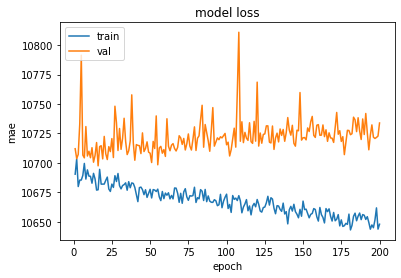

In [14]:
epochs = range(1, len(history.history['mae']) + 1) 
plt.plot(epochs, history.history['loss']) 
plt.plot(epochs, history.history['val_loss']) 
plt.title('model loss') 
plt.ylabel('mae') 
plt.xlabel('epoch') 
plt.legend(['train', 'val'], loc='upper left') 
plt.show()

In [16]:
model.evaluate(x_eval, y_eval)

532/532 [==============================] - 1s 2ms/step - loss: 10704.8750 - mae: 10704.8750


[10704.875, 10704.875]

In [17]:
%%time
pred = model.predict(x_eval)

CPU times: user 531 ms, sys: 52.8 ms, total: 583 ms
Wall time: 460 ms


In [18]:
# AI가 예측한 값
pred[:10]

array([[7.8169797e+04, 1.6135069e+02, 1.5231314e+02, 1.8799289e+02],
       [7.7899383e+04, 1.8485432e+02, 1.7811221e+02, 2.1266714e+02],
       [8.5985164e+04, 1.5230443e+02, 1.3846780e+02, 1.6887140e+02],
       [8.7469828e+04, 2.0533307e+02, 1.7311502e+02, 5.9027306e+01],
       [8.5742555e+04, 2.0248999e+02, 1.8095322e+02, 1.2984097e+02],
       [8.0744188e+04, 2.1180627e+02, 1.7535202e+02, 2.1208438e+02],
       [7.7474648e+04, 1.0892061e+02, 1.1946151e+02, 1.6254422e+02],
       [7.8976820e+04, 1.7873103e+02, 1.5405576e+02, 5.7027885e+01],
       [7.8339305e+04, 1.3371936e+02, 1.2898001e+02, 1.1893099e+02],
       [7.8064680e+04, 1.5105237e+02, 1.3413882e+02, 1.3167288e+02]],
      dtype=float32)

In [19]:
# 실제 정답
y_eval[:10]

array([[ 31707,    210,    130,    160],
       [114415,     60,    300,    210],
       [162424,     60,    120,    240],
       [132899,    300,    210,     10],
       [ 88735,    220,    250,     60],
       [ 78988,    180,     40,    300],
       [100267,    270,     10,     90],
       [  4991,    300,    100,     40],
       [142319,    100,     20,    200],
       [148424,    150,    230,     40]])

In [0]:
# 정답이 없는 test data값을 이용하여 예측값을 생성.
pred_test = model.predict(test_X)

In [0]:
now = datetime.now() 
timestamp=now.strftime("%Y%m%d_%H%M")

In [22]:
# 제출 파일을 만듦
sample_sub = pd.read_csv('sample_submission.csv', index_col=0)
submission = sample_sub+pred_test
submission.to_csv("submission_"+timestamp+"_your_name.csv")

FileNotFoundError: ignored